In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from commom_tools import read_covid_data
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

ModuleNotFoundError: No module named 'commom_tools'

In [53]:
# Load data
data = pd.read_csv('data\owid-covid-data.csv')
data.dropna(subset=['new_cases'], inplace=True)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [54]:
afg_data = data[data['iso_code'] == 'AFG']
date = afg_data['date']
new_cases = afg_data['new_cases_smoothed']

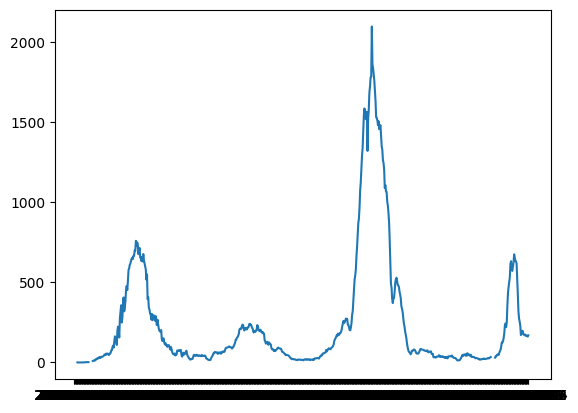

In [55]:
# Plot data
plt.plot(date, new_cases.values)

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# 過濾 NaN 和 inf
time_series = pd.Series(new_cases.values, index=pd.to_datetime(date))  # 確保索引為日期
time_series = time_series[~np.isinf(time_series)]
time_series = time_series[~np.isnan(time_series)]

# 檢查數據有效性
if time_series.empty:
    print("time_series is empty after filtering. Check your 'total_cases' data.")
elif time_series.max() == time_series.min():
    print("time_series data is constant, cannot run ADF test.")
elif len(time_series) < 10:
    print("Not enough data points for ARIMA or ADF test.")
else:
    # ADF 測試
    result = adfuller(time_series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("數據是平穩的")
    else:
        print("數據不是平穩的，需要進行差分")

    # 差分處理（如果需要）
    time_series_diff = time_series.diff().dropna()

    # 確認差分後數據
    print(time_series_diff.head())

ADF Statistic: -3.2393162655440135
p-value: 0.01781875018275301
數據是平穩的
date
2020-03-02   -0.714
2020-03-03    0.000
2020-03-04    0.000
2020-03-05    0.000
2020-03-06    0.000
dtype: float64


In [57]:
# 訓練模型
model = ARIMA(time_series, order=(1, 1, 1))
fitted_model = model.fit()

# 顯示模型摘要
print(fitted_model.summary())

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  721
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3488.586
Date:                Thu, 05 Dec 2024   AIC                           6983.173
Time:                        15:54:37   BIC                           6996.910
Sample:                             0   HQIC                          6988.476
                                - 721                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9293      0.011     85.048      0.000       0.908       0.951
ma.L1         -0.7943      0.016    -51.100      0.000      -0.825      -0.764
sigma2       945.9628     13.107     72.170      0.0

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


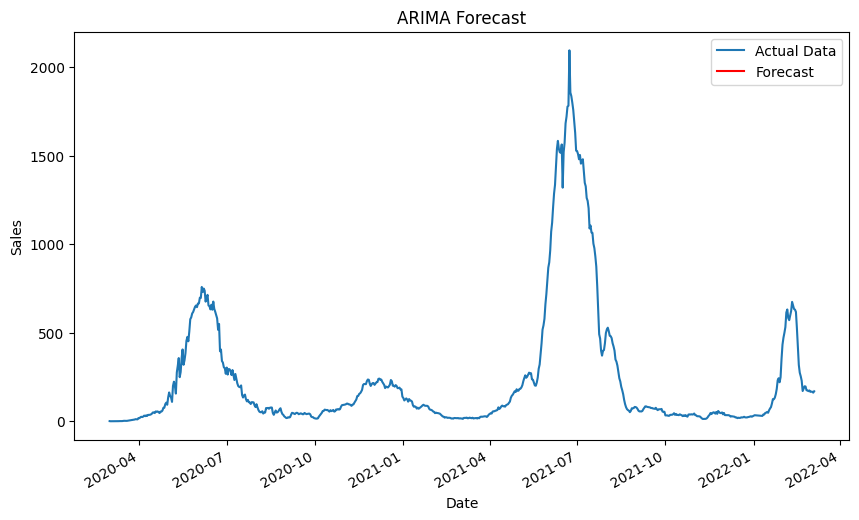

In [58]:
# 進行預測
forecast = fitted_model.forecast(steps=120)  # 預測未來120天
forecast_index = pd.date_range(start='2021-08-01', periods=120)  # 生成日期索引

# 畫出預測結果
plt.figure(figsize=(10, 6))
time_series.plot(label="Actual Data")
forecast_series = pd.Series(forecast, index=forecast_index)
forecast_series.plot(label="Forecast", color="red")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()